## KMeans clustering

#### Objective

- Implement a KMeans clustering Algorithm
- Cluster the TFIDF matrix from the corpus.

## KMeans Clustering - Implementation steps

K - Number of cluster


- Initialize the K random centroids with dimension of 1 * len(features)
- Initialize the previous centroid data to zero with same dimension of initial centroid
- Calculate the distance from centroid and each of the point (Euclidian Distance)
- Store the minimum distance to the centroid and store the minimum value
- Calculate the mean of the clusters and assign to initial centroid
- Repeat the process till the Mean become same or Maximum Iteration (Convergence)

Ref: Andrew NG - Course Era Course - Unsupervised Learning


In [33]:
#imports for interactive notebook
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
#for logs
import logging
logger = logging.getLogger(__name__)
import pandas as pd
import numpy as np

In [2]:
#reading the TFIDF MAtrix from last problem - which contain TFIDF of two corpus
corpus = pd.read_csv(r"C:\Users\ajaighosh.ramachandr\Desktop\AJ\studies_ml\kaggle\nineleaps\tfidf_clustering\run\tfidf_values_corpus1.csv")

In [3]:
# Analysing the DataFrame
corpus.shape
corpus.head(1)
corpus.columns[0]
corpus = corpus.drop(corpus.columns[0], axis = 1)

(1273, 2512)

,Unnamed: 0,abandoned,abhor,ability,abode,absolute,absolutely,absolutly,absorb,abused,...,yield,yourlife,youve,yrs,zarent,zipper,zone,zoom,zoombrowser,zooms
0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


'Unnamed: 0'

In [4]:
# Statistical Analysis
corpus.describe()

,abandoned,abhor,ability,abode,absolute,absolutely,absolutly,absorb,abused,accept,...,yield,yourlife,youve,yrs,zarent,zipper,zone,zoom,zoombrowser,zooms
count,1273.000000,1273.000000,1273.00000,1273.000000,1273.000000,1273.000000,1273.000000,1273.000000,1273.000000,1273.000000,...,1273.000000,1273.000000,1273.0,1273.000000,1273.000000,1273.000000,1273.000000,1273.000000,1273.000000,1273.000000
mean,0.000803,0.000625,0.00170,0.001406,0.001406,0.005216,0.000895,0.000433,0.005623,0.000937,...,0.000511,0.000803,0.0,0.000803,0.000703,0.000937,0.003212,0.008567,0.001406,0.001451
std,0.028662,0.022293,0.03637,0.050159,0.050159,0.080355,0.026578,0.015434,0.200636,0.033439,...,0.018240,0.028662,0.0,0.028662,0.025079,0.033439,0.064953,0.089049,0.050159,0.036595
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.022645,0.795390,0.86570,1.789628,1.789628,1.788918,0.923624,0.550655,7.158514,1.193086,...,0.650774,1.022645,0.0,1.022645,0.894814,1.193086,1.924073,1.506486,1.789628,0.923624


In [5]:
# Converted the Dataframe to nparray for clustering
dataset = np.array(corpus)

In [6]:
# Shape
dataset.shape

(1273, 2511)

In [7]:
dataset[1]

array([ 0.,  0.,  0., ...,  0.,  0.,  0.])

In [8]:
# Appending the LIB path to the sys path
import os
os.getcwd()
import sys
sys.path.append(os.getcwd())
sys.path.append(os.path.join(os.pardir, 'lib'))

'C:\\Users\\ajaighosh.ramachandr\\Desktop\\AJ\\studies_ml\\kaggle\\nineleaps\\tfidf_clustering\\run'

In [9]:
# Importing the cluster module
from cluster.kmeans_advanced import KMeansAdvanced

In [10]:
# Initialize the cluster
clus = KMeansAdvanced()

In [21]:
# Finding the best fit and classes
init_centroid, classes = clus.fit(dataset)

In [23]:
len(classes)

1273

In [24]:
dataset

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [26]:
# Adding the classes or cluster identity to the dataframe
corpus['Classes'] = classes

In [28]:

corpus.describe()

,abandoned,abhor,ability,abode,absolute,absolutely,absolutly,absorb,abused,accept,...,yourlife,youve,yrs,zarent,zipper,zone,zoom,zoombrowser,zooms,Classes
count,1273.000000,1273.000000,1273.00000,1273.000000,1273.000000,1273.000000,1273.000000,1273.000000,1273.000000,1273.000000,...,1273.000000,1273.0,1273.000000,1273.000000,1273.000000,1273.000000,1273.000000,1273.000000,1273.000000,1273.000000
mean,0.000803,0.000625,0.00170,0.001406,0.001406,0.005216,0.000895,0.000433,0.005623,0.000937,...,0.000803,0.0,0.000803,0.000703,0.000937,0.003212,0.008567,0.001406,0.001451,0.003928
std,0.028662,0.022293,0.03637,0.050159,0.050159,0.080355,0.026578,0.015434,0.200636,0.033439,...,0.028662,0.0,0.028662,0.025079,0.033439,0.064953,0.089049,0.050159,0.036595,0.062573
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.022645,0.795390,0.86570,1.789628,1.789628,1.788918,0.923624,0.550655,7.158514,1.193086,...,1.022645,0.0,1.022645,0.894814,1.193086,1.924073,1.506486,1.789628,0.923624,1.000000


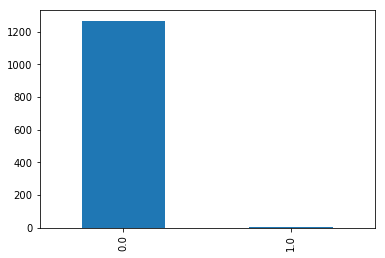

In [32]:
# Finding the value counts for cluster and compare the cluster count
corpus.Classes.value_counts().plot.bar()

In [36]:
# Adding the sumTFidf to the Dataframe
corpus['SumTfidf'] = corpus.sum(axis=1)

In [40]:
corpus.SumTfidf.value_counts().head(2)

7.158514    27
6.465367     9
Name: SumTfidf, dtype: int64

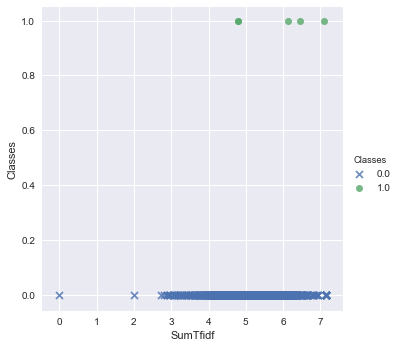

In [45]:
# Plotting the cluster
import seaborn as sns

sns.lmplot(x='SumTfidf', y='Classes',hue = 'Classes', 
           markers=['x', 'o'],
           fit_reg=False, data=corpus)

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

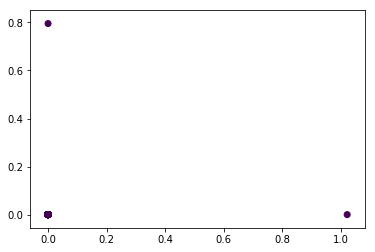

In [13]:
plt.scatter(dataset[:,0], dataset[:,1], c=classes)
plt.show()

In [14]:
len(dataset[:,0])
len(dataset[:,1])

1273

1273

In [15]:
from sklearn.model_selection import train_test_split


In [16]:
X_train, X_test = train_test_split(dataset, test_size=0.33)

In [17]:
X_train.shape

(852, 2511)

In [18]:
X_test.shape

(421, 2511)

In [19]:
clus1 = KMeansAdvanced()

In [20]:
init_centroid, classes = clus1.fit(X_train)s